In [1]:
from pprint import pprint

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Set Seaborn theme and default palette
sns.set_context("talk")
sns.set_theme(font_scale=1.25, style="whitegrid")
sns.set_palette("deep", desat=0.85, color_codes=True)

# Turn on inline plotting
%matplotlib inline

# Load Black auto-formatter
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Import my modules
from tools import plotting
from tools.sklearn.vectorizers import FreqVectorizer

FIT_MODEL = True

# Set my default MPL settings
plt.rcParams.update(plotting.MPL_DEFAULTS)

# Enable automatic reloading
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


# Modeling
## Loading the Data

In [3]:
# Load training data
df = pd.read_parquet("data/model_data", engine="pyarrow")

# Shuffle for good measure
df = df.sample(frac=1, random_state=68)

df.head()

text  \
asin                                                            
B000FQFC4S  chicago_cutlery metropolitan pc_set metropolit...   
B01F8GU532  brand_new idle_air control_valve iac ford_oem ...   
B00O9WDEJO  uxcell screw type furniture level_foot adjuste...   
B000P1OZ2S  plug_play video paintball trainer game hasbro ...   
B00FPTGT9C  five_ocean windshield hatch adjuster stainless...   

                                                        title  \
asin                                                            
B000FQFC4S            chicago cutlery metropolitan 10-pc. set   
B01F8GU532  brand new idle air control valve iac for 2001-...   
B00O9WDEJO  uxcell screw on type furniture leveling foot a...   
B000P1OZ2S  plug & play video paintball trainer game by ha...   
B00FPTGT9C  five oceans windshield hatch adjuster, stainle...   

                      brand           main_cat  
asin                                            
B000FQFC4S  chicago_cutlery        amazon home  
B01F8GU532  aip_electronics         automotive  
B00O9WDEJO           uxcell        amazon home  
B000P1OZ2S           hasbro       toys & games  
B00FPTGT9C      five_oceans  sports & outdoors

<IPython.core.display.Javascript object>

In [4]:
X = df.loc[:, "text"]
y = df.loc[:, "main_cat"]

X.shape, y.shape

((1072953,), (1072953,))

<IPython.core.display.Javascript object>

In [5]:
pipe = joblib.load("models/svm_3.joblib")
pipe

Pipeline(steps=[('vec',
                 TfidfVectorizer(binary=True, lowercase=False,
                                 token_pattern='\\S+')),
                ('cls',
                 SGDClassifier(alpha=5.25503769545935e-07, average=True,
                               class_weight='balanced', eta0=0.8416663608926325,
                               learning_rate='adaptive', n_jobs=-1))],
         verbose=True)

<IPython.core.display.Javascript object>

In [6]:
def extract_coef(
    pipeline, classifier="cls", vectorizer="vec",
):
    """Returns labeled model coefficients as a DataFrame."""
    columns = np.array(pipeline[vectorizer].get_feature_names())
    coef = pd.DataFrame(
        pipeline[classifier].coef_,
        index=pipeline[classifier].classes_,
        columns=columns,
    ).T
    return coef

<IPython.core.display.Javascript object>

## Refitting the Model

Next I refit the model on the full `X`.

In [7]:
if FIT_MODEL:
    # Train on full X
    pipe.fit(X, y)
    joblib.dump(pipe, "models/final_refit.joblib", compress=True)

else:
    # Load the saved model
    pipe = joblib.load("models/final_refit.joblib")
pipe

[Pipeline] ............... (step 1 of 2) Processing vec, total= 1.3min
[Pipeline] ............... (step 2 of 2) Processing cls, total=14.3min


Pipeline(steps=[('vec',
                 TfidfVectorizer(binary=True, lowercase=False,
                                 token_pattern='\\S+')),
                ('cls',
                 SGDClassifier(alpha=5.25503769545935e-07, average=True,
                               class_weight='balanced', eta0=0.8416663608926325,
                               learning_rate='adaptive', n_jobs=-1))],
         verbose=True)

<IPython.core.display.Javascript object>

In [8]:
len(pipe["vec"].get_feature_names())

661575

<IPython.core.display.Javascript object>

In [9]:
coef = extract_coef(pipe)
coef = coef.sort_values("video games", ascending=False)
coef.head(10)

all beauty  all electronics  amazon devices  amazon fashion  \
cta_digital      -0.137917        -1.588488       -0.390636       -0.104482   
electronic_art   -0.075102        -0.831730       -0.008441       -0.126157   
ubisoft          -0.196680        -0.476108       -0.015196       -0.086254   
activision       -0.006750        -0.245864       -0.080634       -0.251701   
atari            -0.024825        -0.579617       -0.020503       -0.080473   
mad_catz          0.000000        -2.179558       -0.063354        0.000000   
nintendo         -0.415398        -1.767491       -0.652718       -0.220603   
sega             -0.073412        -0.345276        0.000000       -0.016580   
thq               0.000000        -0.431152        0.000000       -0.105473   
screenseven       0.000000        -0.123709       -0.019910       -0.106660   

                amazon home  appliances  arts, crafts & sewing  automotive  \
cta_digital       -0.589268   -0.076356              -0.032287   -0.401737   
electronic_art    -1.137043   -0.075289               0.000000   -0.407114   
ubisoft           -0.309724    0.000000              -0.038208   -0.246341   
activision        -0.085424    0.000000               0.000000   -0.300412   
atari             -0.102223   -0.010338               0.000000   -0.260968   
mad_catz          -0.315578    0.000000              -0.009604   -0.099351   
nintendo          -0.536753    0.000000              -0.017848   -0.138654   
sega              -0.114264   -0.070775              -0.065777   -0.115474   
thq                0.000000   -0.009817               0.000000   -0.459216   
screenseven       -0.138093    0.000000               0.000000    0.000000   

                    baby     books  ...  musical instruments  office products  \
cta_digital    -0.041310  0.000000  ...            -0.776465        -0.222383   
electronic_art  0.000000 -2.288414  ...             0.000000        -0.219381   
ubisoft        -0.060215 -2.586835  ...            -0.357771        -0.149749   
activision     -0.015428 -2.302316  ...            -0.710259        -0.091207   
atari           0.000000 -1.779429  ...            -0.235146        -0.070838   
mad_catz        0.000000  0.000000  ...            -2.178444        -0.057857   
nintendo       -0.133070 -1.451489  ...            -0.616471        -0.421058   
sega           -0.010435 -1.825415  ...            -0.188339        -0.068753   
thq            -0.086213 -1.919700  ...            -0.122682         0.000000   
screenseven     0.000000 -1.970656  ...             0.000000         0.000000   

                pet supplies  portable audio & accessories  prime pantry  \
cta_digital        -0.087789                     -0.334188      0.000000   
electronic_art     -0.395503                     -0.006948     -0.015546   
ubisoft            -0.321316                     -0.008112     -0.019325   
activision         -0.508789                     -0.012507      0.000000   
atari              -0.009657                     -0.007722     -0.024089   
mad_catz            0.000000                     -0.081973      0.000000   
nintendo           -0.226268                     -0.230048      0.000000   
sega               -0.035597                     -0.019251      0.000000   
thq                -1.036814                      0.000000      0.000000   
screenseven        -0.010792                      0.000000     -0.092420   

                software  sports & outdoors  tools & home improvement  \
cta_digital     0.000000          -1.787175                 -0.403483   
electronic_art -2.117975          -2.003761                 -0.195627   
ubisoft        -2.753293          -0.676836                 -0.126649   
activision     -1.768934          -2.414997                 -0.342251   
atari          -2.423539          -1.309421                 -0.054091   
mad_catz       -0.137431          -1.299903                 -0.112699   
nintendo       -0.765551          -1.654036    

<IPython.core.display.Javascript object>

In [10]:
coef.columns = coef.columns.str.title()
coef.head()

All Beauty  All Electronics  Amazon Devices  Amazon Fashion  \
cta_digital      -0.137917        -1.588488       -0.390636       -0.104482   
electronic_art   -0.075102        -0.831730       -0.008441       -0.126157   
ubisoft          -0.196680        -0.476108       -0.015196       -0.086254   
activision       -0.006750        -0.245864       -0.080634       -0.251701   
atari            -0.024825        -0.579617       -0.020503       -0.080473   

                Amazon Home  Appliances  Arts, Crafts & Sewing  Automotive  \
cta_digital       -0.589268   -0.076356              -0.032287   -0.401737   
electronic_art    -1.137043   -0.075289               0.000000   -0.407114   
ubisoft           -0.309724    0.000000              -0.038208   -0.246341   
activision        -0.085424    0.000000               0.000000   -0.300412   
atari             -0.102223   -0.010338               0.000000   -0.260968   

                    Baby     Books  ...  Musical Instruments  Office Products  \
cta_digital    -0.041310  0.000000  ...            -0.776465        -0.222383   
electronic_art  0.000000 -2.288414  ...             0.000000        -0.219381   
ubisoft        -0.060215 -2.586835  ...            -0.357771        -0.149749   
activision     -0.015428 -2.302316  ...            -0.710259        -0.091207   
atari           0.000000 -1.779429  ...            -0.235146        -0.070838   

                Pet Supplies  Portable Audio & Accessories  Prime Pantry  \
cta_digital        -0.087789                     -0.334188      0.000000   
electronic_art     -0.395503                     -0.006948     -0.015546   
ubisoft            -0.321316                     -0.008112     -0.019325   
activision         -0.508789                     -0.012507      0.000000   
atari              -0.009657                     -0.007722     -0.024089   

                Software  Sports & Outdoors  Tools & Home Improvement  \
cta_digital     0.000000          -1.787175                 -0.403483   
electronic_art -2.117975          -2.003761                 -0.195627   
ubisoft        -2.753293          -0.676836                 -0.126649   
activision     -1.768934          -2.414997                 -0.342251   
atari          -2.423539          -1.309421                 -0.054091   

                Toys & Games  Video Games  
cta_digital        -0.471310     9.906398  
electronic_art     -4.652451     9.456493  
ubisoft            -3.249705     9.301768  
activision         -3.907305     9.217021  
atari              -3.394570     8.941037  

[5 rows x 36 columns]

<IPython.core.display.Javascript object>

In [11]:
rng = np.random.default_rng(55)

cmaps = [
    "Purples",
    "Blues",
    "Greens",
    "Oranges",
    "Reds",
    "YlOrBr",
    "YlOrRd",
    "OrRd",
    "PuRd",
    "RdPu",
    "BuPu",
    "GnBu",
    "PuBu",
    "YlGnBu",
    "PuBuGn",
    "BuGn",
    "YlGn",
]
cmaps = rng.choice(cmaps, coef.columns.size).tolist()
cmaps

['YlGn',
 'PuBuGn',
 'PuBu',
 'PuBuGn',
 'Oranges',
 'Oranges',
 'YlGnBu',
 'Oranges',
 'BuPu',
 'PuRd',
 'YlOrBr',
 'PuBu',
 'PuRd',
 'GnBu',
 'Blues',
 'YlGn',
 'YlGnBu',
 'Blues',
 'GnBu',
 'PuRd',
 'YlOrRd',
 'YlOrBr',
 'YlOrRd',
 'BuPu',
 'Purples',
 'Purples',
 'OrRd',
 'YlOrBr',
 'GnBu',
 'Blues',
 'PuRd',
 'YlGn',
 'YlGn',
 'BuPu',
 'Reds',
 'PuRd']

<IPython.core.display.Javascript object>

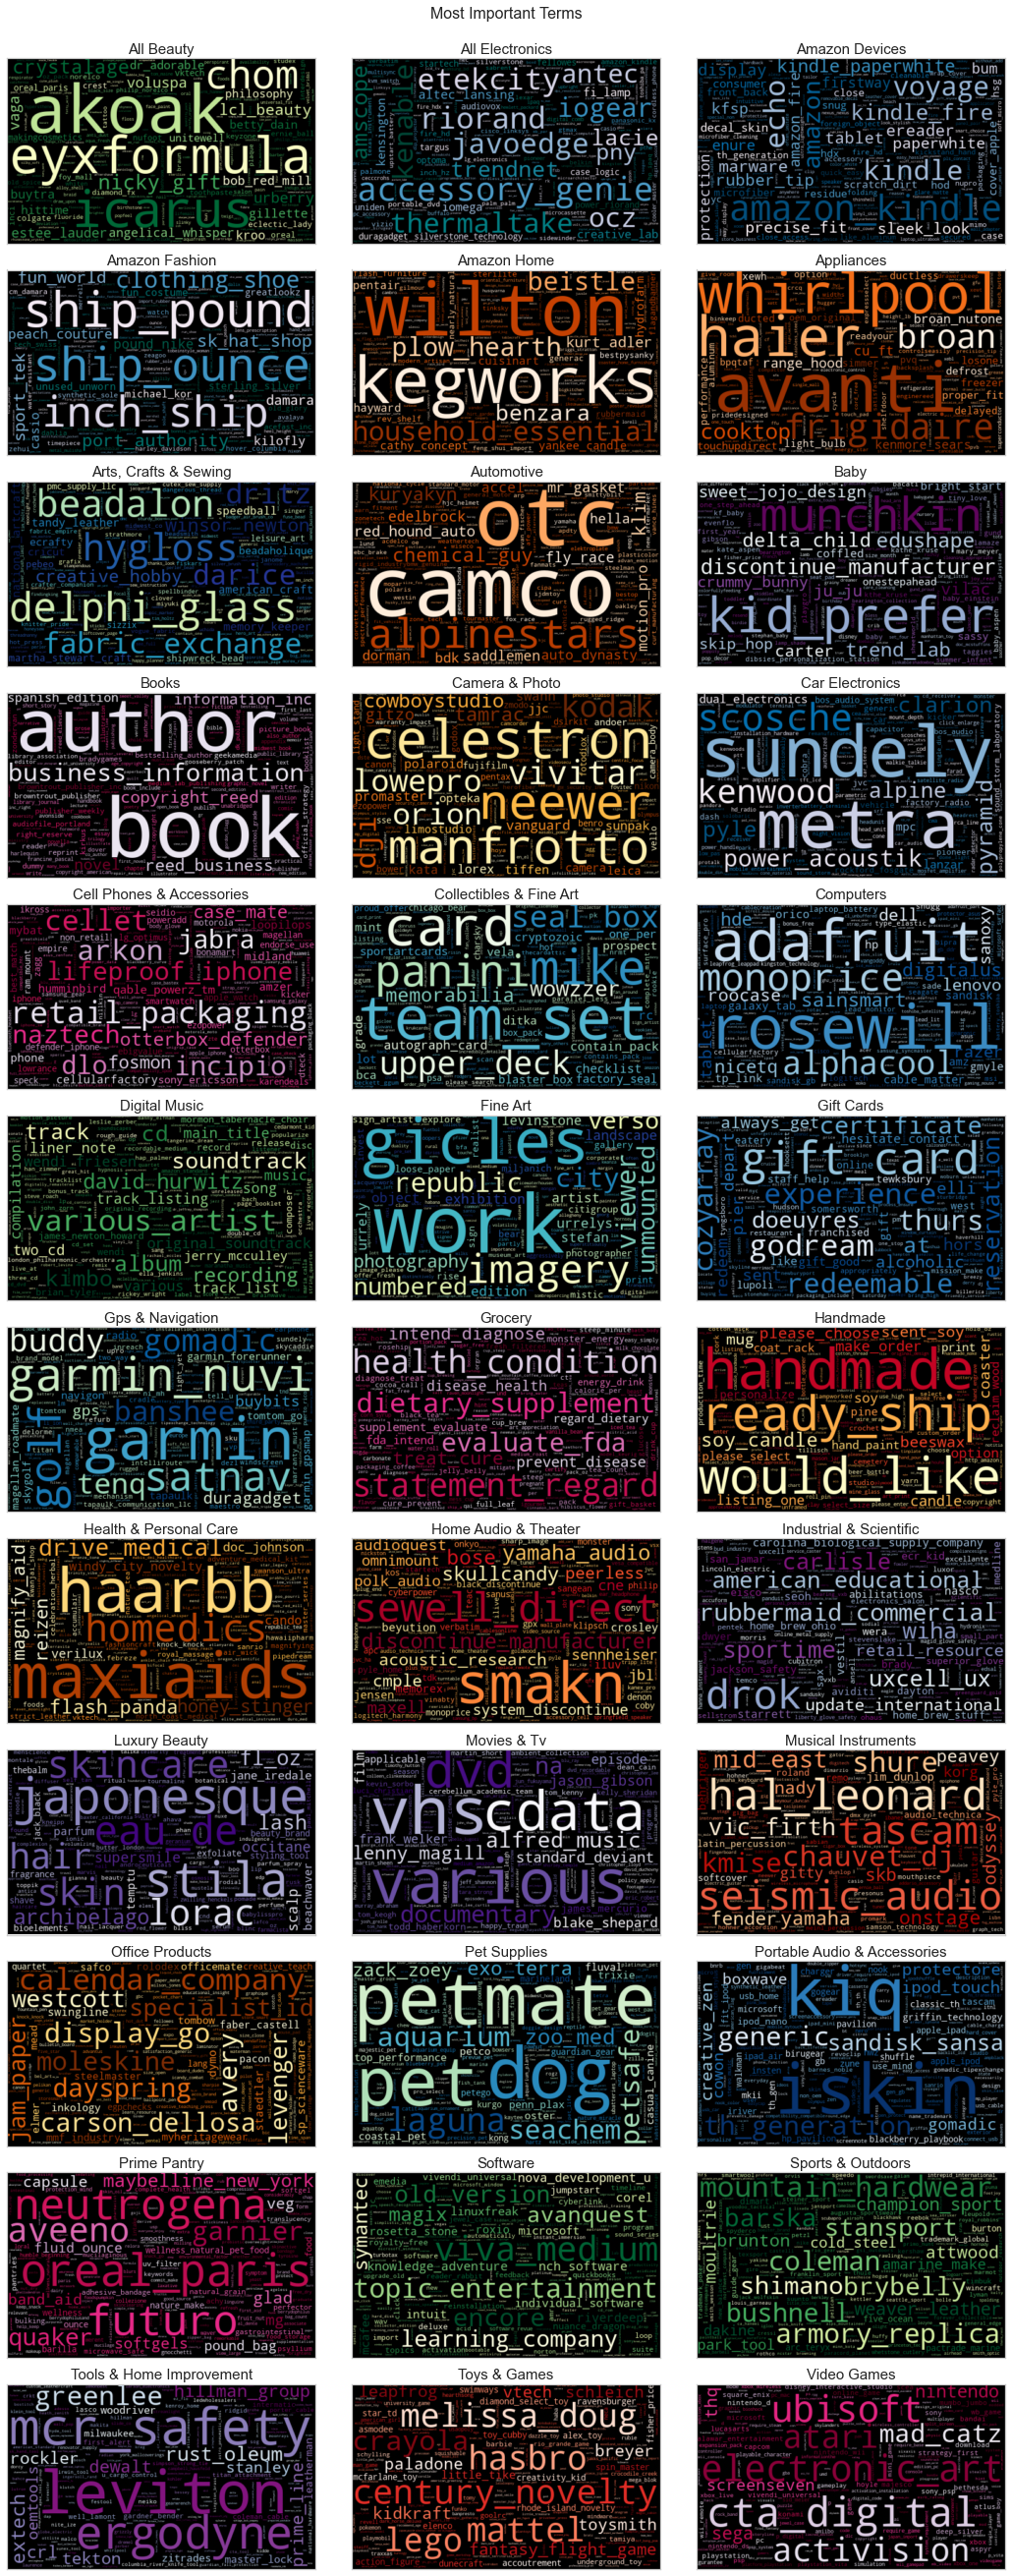

<IPython.core.display.Javascript object>

In [12]:
fig = plotting.wordcloud(coef, cmap=cmaps,)
fig.suptitle("Most Important Terms", y=1.01, fontsize=16)
fig.savefig("figures/final_refit_coef.svg", bbox_inches="tight")

In [13]:
ngrams = [tuple(w.split("_")) for w in pipe["vec"].vocabulary_.keys() if "_" in w]
max(map(len, ngrams))

6

<IPython.core.display.Javascript object>

In [14]:
if not isinstance(pipe.steps[0], FreqVectorizer):
    fv = FreqVectorizer.from_sklearn(pipe["vec"])
    pipe.steps[0] = ("vec", fv)
pipe

Pipeline(steps=[('vec',
                 FreqVectorizer(binary=True, lowercase=False, norm='l2',
                                token_pattern='\\S+', use_idf=True)),
                ('cls',
                 SGDClassifier(alpha=5.25503769545935e-07, average=True,
                               class_weight='balanced', eta0=0.8416663608926325,
                               learning_rate='adaptive', n_jobs=-1))],
         verbose=True)

<IPython.core.display.Javascript object>

In [15]:
stop_words = set(pd.read_json("canonical_params/stopwords.json", typ="series"))
pprint(stop_words, compact=True)

{'about', 'above', 'additional', 'address', 'addresses', 'after', 'again',
 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'apo', 'are', 'aren', 'as',
 'asin', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both',
 'but', 'buy', 'by', 'can', 'cash', 'com', 'couldn', 'customer', 'deal',
 'delivery', 'detail', 'did', 'didn', 'dimensions', 'do', 'does', 'doesn',
 'doing', 'don', 'down', 'during', 'each', 'eligible', 'feature', 'few', 'for',
 'fpo', 'from', 'further', 'guarantee', 'had', 'hadn', 'has', 'hasn', 'have',
 'haven', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself',
 'his', 'how', 'if', 'in', 'inches', 'into', 'is', 'isn', 'it', 'item', 'its',
 'itself', 'just', 'listed', 'll', 'ma', 'me', 'mightn', 'more', 'most',
 'mustn', 'my', 'myself', 'needn', 'no', 'nor', 'not', 'now', 'of', 'off', 'on',
 'once', 'only', 'or', 'other', 'ounces', 'our', 'ours', 'ourselves', 'out',
 'over', 'own', 'package', 'pounds', 'premium', 'product', 'purchase',

<IPython.core.display.Javascript object>

In [16]:
pipe["vec"].set_params(
    lowercase=True,
    stop_words=stop_words,
    strip_accents="ascii",
    strip_html_tags=True,
    strip_punct="_",
    uniq_char_thresh=0.375,
    stemmer="wordnet",
    token_pattern="(?i)\\b[a-z_]{2,16}\\b",
    ngram_range=(1, 6),
)

FreqVectorizer(binary=True, ngram_range=(1, 6), norm='l2', stemmer='wordnet',
               stop_words={'about', 'above', 'additional', 'address',
                           'addresses', 'after', 'again', 'against', 'ain',
                           'all', 'am', 'an', 'and', 'any', 'apo', 'are',
                           'aren', 'as', 'asin', 'be', 'because', 'been',
                           'before', 'being', 'below', 'between', 'both', 'but',
                           'buy', 'by', ...},
               strip_accents='ascii', strip_html_tags=True, strip_punct='_',
               token_pattern='(?i)\\b[a-z_]{2,16}\\b', uniq_char_thresh=0.375,
               use_idf=True)

<IPython.core.display.Javascript object>

In [17]:
pipe

Pipeline(steps=[('vec',
                 FreqVectorizer(binary=True, ngram_range=(1, 6), norm='l2',
                                stemmer='wordnet',
                                stop_words={'about', 'above', 'additional',
                                            'address', 'addresses', 'after',
                                            'again', 'against', 'ain', 'all',
                                            'am', 'an', 'and', 'any', 'apo',
                                            'are', 'aren', 'as', 'asin', 'be',
                                            'because', 'been', 'before',
                                            'being', 'below', 'between', 'both',
                                            'but', 'buy', 'by', ...},
                                strip_accents='ascii', strip_html_tags=True,
                                strip_punct='_',
                                token_pattern='(?i)\\b[a-z_]{2,16}\\b',
                                uniq_cha

<IPython.core.display.Javascript object>

In [18]:
joblib.dump(pipe, "models/final_deploy.joblib", compress=("lz4", 3))

['models/final_deploy.joblib']

<IPython.core.display.Javascript object>